In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
data = pd.read_excel("datasupermarket.xlsx")

In [9]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,419136.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219582.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,68714.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,9575775.00,5,0.45,-383031.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22368.00,2,0.20,25164.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25248.00,3,0.20,41028.00
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.96,2,0.00,156332.00
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258576.00,2,0.20,193932.00
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.60,4,0.00,13.32


In [15]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,0.00,419136.0
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,0.00,219582.0
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,0.00,68714.0
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,9575775.00,0.45,-383031.0
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22368.00,0.20,25164.0


In [17]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Discount', 'Profit'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
data.drop(["Postal Code","Quantity",],axis=1, inplace = True)
data

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,0.00,419136.00
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,0.00,219582.00
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,0.00,68714.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,9575775.00,0.45,-383031.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22368.00,0.20,25164.00
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25248.00,0.20,41028.00
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.96,0.00,156332.00
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258576.00,0.20,193932.00
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.60,0.00,13.32


In [19]:
data.corr()

,Sales,Discount,Profit
Sales,1.000000,0.105990,0.010452
Discount,0.105990,1.000000,-0.180701
Profit,0.010452,-0.180701,1.000000


<AxesSubplot:>

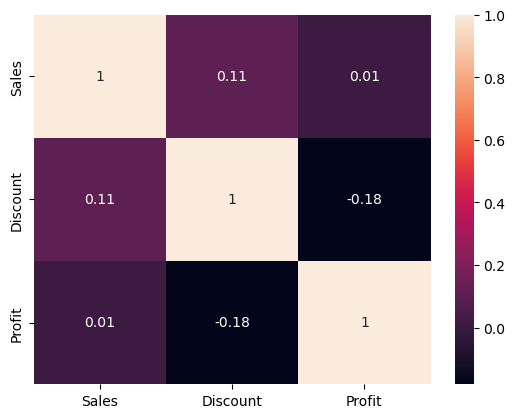

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

Berdasarkan data tersebut, dapat dilihat bahwa pembeli terbanyak di United State adalah bagian Barat dengan jumlah konsumen sebanyak 3203 konsumen. Sedangkan, bagian Selatan menjadi bagian dengan jumlah konsumen paling sedikit yaitu 1620 konsumen. Berdasarkan hasil tersebut, perusahaan dapat melakukan analisa lebih lanjut untuk pengembangan promosi dan penjualan di United State bagian Selatan. Perusahaan juga dapat mengembangkan atau menambah toko di beberapa titik United State bagian Barat. 

In [22]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

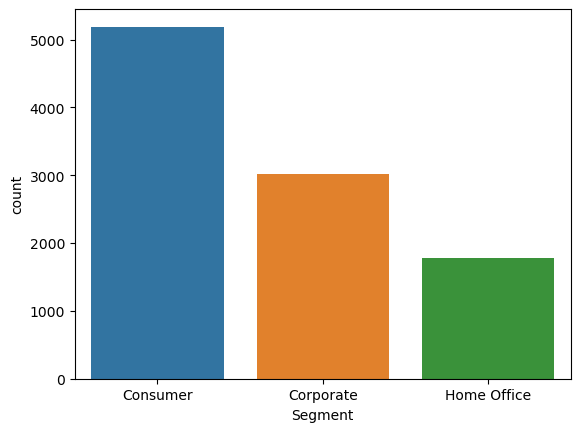

In [23]:
sns.countplot(x=data['Segment'])

Berdasarkan grafik tersebut, dapat dilihat bahwa konsumen terbesar berasal dari konsumen perseorangan dengan jumlah transaksi sebanyak 5191. Oleh karena itu, dapat ditingkatkan lagi penawaran untuk corporate dan home office.

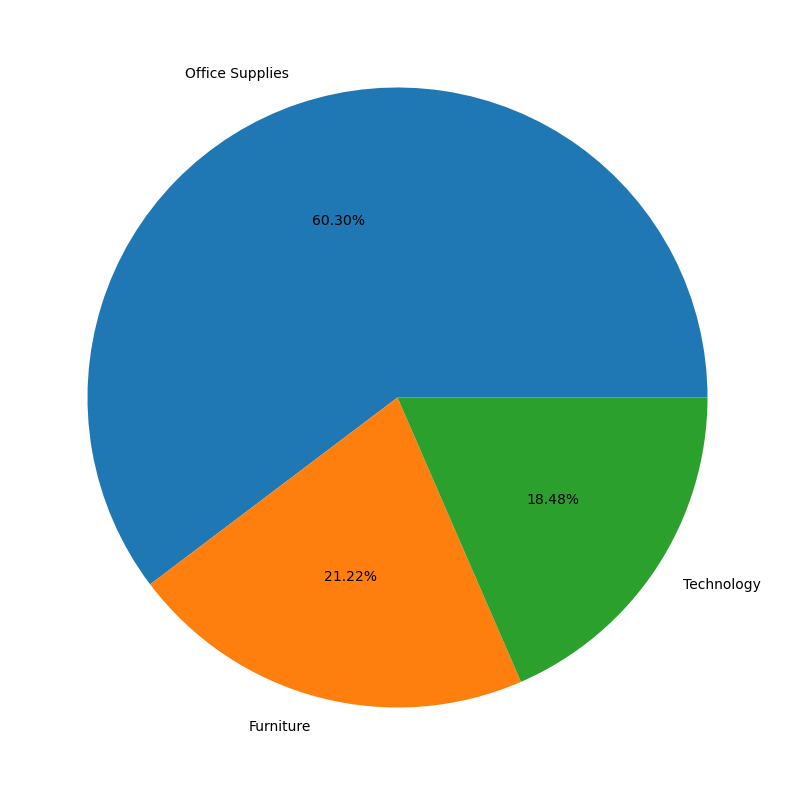

In [24]:
plt.figure(figsize=(10,15))
plt.pie(data["Category"].value_counts(), labels= data["Category"].value_counts().index, autopct ="%.2f%%")
plt.show()

Untuk kategori barang yang terjual, sebagian besar didominasi oleh jenis barang office supplies sebanyak 60,30%. 
Jika perusahaan ingin memaksimalkan keuntungan, perusahaan dapat mengalokasikan sebagian besar gudang untuk diisi oleh produk dengan jenis office supplies. Perusahaan dapat mengurangi pembelian produk dengan jenis Technology, karena persentase produk yang terjual sangat sedikit.

In [25]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Dalam kategori office suppply, jumlah barang terbanyak yang terjual adalah Binder dan Paper. Perusahaan dapat mengalokasikan
muatan gudang dengan Binder dan Paper untuk memaksimalkan penampungan gudang.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

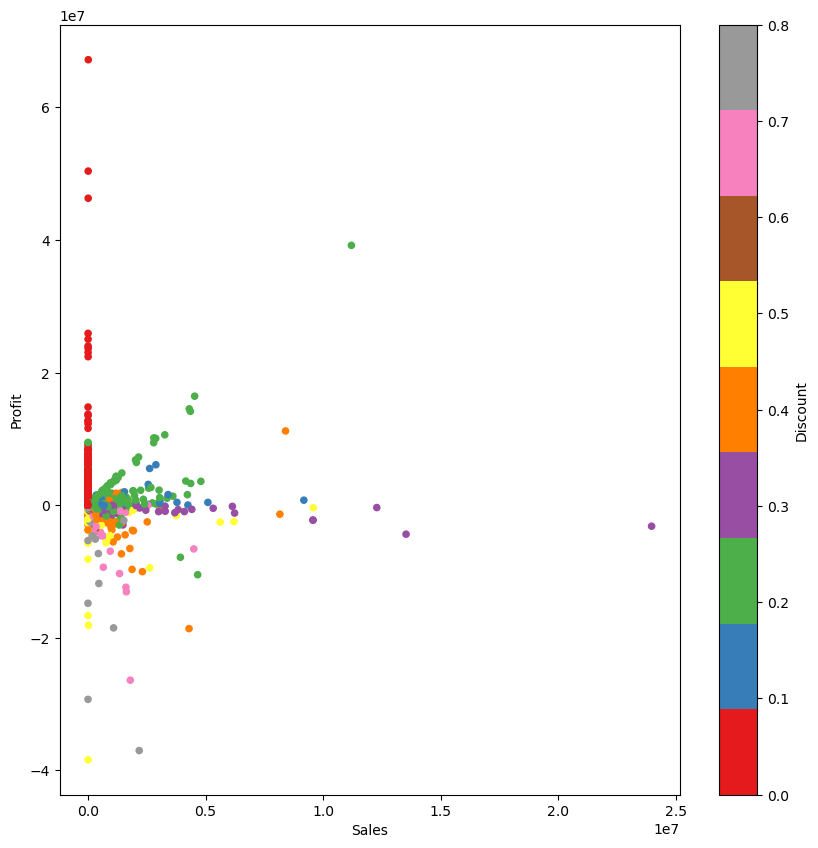

In [26]:
data.plot(kind="scatter",x="Sales",y="Profit", c="Discount", colormap="Set1",figsize=(10,10))